# LWCF Grant Funding in New England

The following analysis relies on grant information by state from 1965-2011 compiled by [Investigate West](http://www.invw.org/2012/06/11/lwcf-grants-database-1283/). Unfortunately, the Land and Water Conservation Fund (LWCF) [Project List by County and Summary Reports](https://waso-lwcf.ncrc.nps.gov/public/index.cfm) page appears to be down. Additionally, the latest Annual Report posted on nps.gov is from 2012.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Import data sets
ct_grants = pd.read_csv('./Data/CT_LWCFGrants1965-2011.csv')
me_grants = pd.read_csv('./Data/ME_LWCFGrants1965-2011.csv')
ma_grants = pd.read_csv('./Data/MA_LWCFGrants1965-2011.csv')
nh_grants = pd.read_csv('./Data/NH_LWCFGrants1965-2011.csv')
ri_grants = pd.read_csv('./Data/RI_LWCFGrants1965-2011.csv')
vt_grants = pd.read_csv('./Data/VT_LWCFGrants1965-2011.csv')

new_england = pd.concat([ct_grants, me_grants, ma_grants, nh_grants, ri_grants, vt_grants], ignore_index=True)

In [3]:
new_england.head()

,Grant ID & Element,Grant Name,Sponsor,County,State,Grant Amount,Year Approved,Year Completed,Type
0,1 - XXX,SULLIVAN PROPERTY,DEPT. OF AGRICULTURE & NATURAL RESOU,HARTFORD,CT,5000.0,1965,1967,Acquisition
1,3 - XXX,ADELMAN FIELD,TOWN OF BOZRAH,MIDDLESEX,CT,3000.0,1965,1966,Acquisition
2,4 - XXX,STATE OUTDOOR RECREATION PLAN,DEPT. OF AGRICULTURE & NATURAL RESOU,PLANNING,CT,22500.0,1965,1966,Planning
3,5 - XXX,COUTU PROPERTY,TOWN OF MANSFIELD,TOLLAND,CT,300.0,1965,1967,Acquisition
4,2 - XXX,GOODWIN STATE FOREST,DEPT. OF AGRICULTURE & NATURAL RESOU,WINDHAM,CT,6000.0,1965,1967,Acquisition


In [4]:
new_england.tail()

,Grant ID & Element,Grant Name,Sponsor,County,State,Grant Amount,Year Approved,Year Completed,Type
3255,626 - XXX,Grand Isle School Community Playground,Town of Grand Isle,GRAND ISLE,VT,34962.0,2011,2011,Development
3256,629 - XXX,Cabin Construction - Three State Parks,"State of Vermont, Dept.of Forests and Parks",MULTI-COUNTY,VT,153638.0,2011,2011,Development
3257,624 - XXX,Tunbridge Recreation Area Acquisition,Town of Tunbridge,ORANGE,VT,11035.0,2011,2011,Acquisition
3258,625 - XXX,Fair Haven Recreation Area and Playground,Town of Fair Haven,RUTLAND,VT,13000.0,2011,2011,Development
3259,627 - XXX,Chester Recreation - Community Pavilion Project,Town of Chester,WINDSOR,VT,17000.0,2011,2011,Development


In [5]:
new_england.shape

(3260, 9)

In [6]:
new_england.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 9 columns):
Grant ID & Element    3260 non-null object
Grant Name            3260 non-null object
Sponsor               3260 non-null object
County                3260 non-null object
State                 3260 non-null object
Grant Amount          3260 non-null float64
Year Approved         3260 non-null int64
Year Completed        3260 non-null int64
Type                  3260 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 229.3+ KB


In [7]:
new_england.describe()['Grant Amount']

count    3.260000e+03
mean     9.548901e+04
std      1.972163e+05
min      1.200000e-01
25%      1.507696e+04
50%      3.449163e+04
75%      9.000000e+04
max      2.596327e+06
Name: Grant Amount, dtype: float64

In [11]:
# State Grant Totals in millions
total_grants = new_england.groupby('State').sum()['Grant Amount'] / 1000000
total_grants

State
CT    63.195093
MA    97.591917
ME    40.857039
NH    36.508412
RI    39.826280
VT    33.315420
Name: Grant Amount, dtype: float64

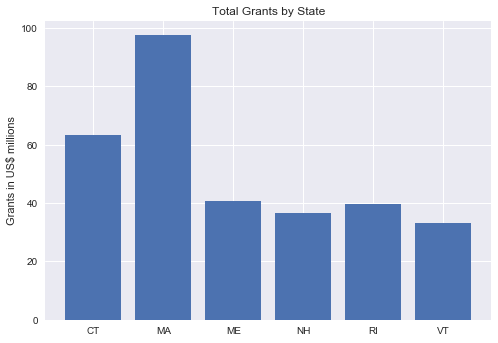

In [9]:
# Plot total grant amounts by state
states = ['CT', 'MA', 'ME', 'NH', 'RI', 'VT']
y_pos = np.arange(len(states))
plt.bar(y_pos, total_grants, align='center')
plt.xticks(y_pos, states)
plt.title('Total Grants by State')
plt.ylabel('Grants in US$ millions')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112ef0ef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116498d30>]], dtype=object)

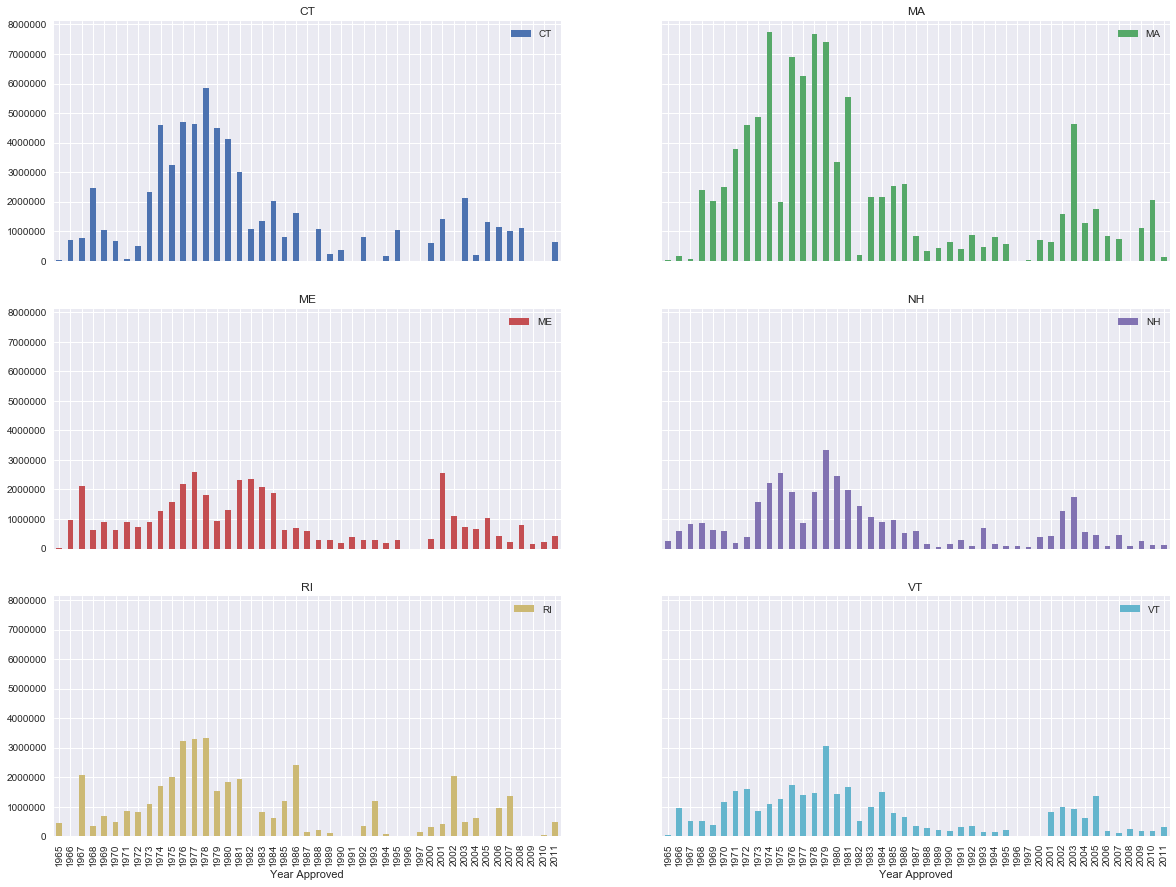

In [10]:
# Plot grant amount (by Year Approved) by year for each state
grants_by_year = []
for state in states:
    tmp = new_england[new_england['State'] == state].groupby('Year Approved').sum()['Grant Amount']
    grants_by_year.append(tmp)

df_grants_by_year = pd.concat(grants_by_year, axis=1)
df_grants_by_year.columns = states
df_grants_by_year.fillna(value=0, inplace=True)
# df_grants_by_year

df_grants_by_year.plot(kind='bar', subplots=True, layout=(3, 2), title=states, sharey=True, figsize=(20, 15))

In general, it appears that Massachusetts and Connecticut are the biggest beneficiares by dollar-amount of LWCF grants (they also have larger populations than the other New England states). Also, based on the annual grant amounts by year, the 1970's seem to be the golden years of investing in conservation project.

In [23]:
# Breakdown of grants by type for each state
grant_type_counts = new_england.groupby(['Type', 'State']).count()['Grant ID & Element']
grant_type_counts

Type           State
Acquisition    CT       199
               MA       126
               ME       152
               NH       189
               RI        77
               VT       135
Combination    CT         9
               MA        31
               ME        77
               NH        43
               RI        14
               VT        31
Development    CT       114
               MA       191
               ME       476
               NH       347
               RI       204
               VT       342
Planning       CT         9
               MA         9
               ME        29
               NH        16
               RI        15
               VT        21
Redevelopment  CT        43
               MA        93
               ME        97
               NH        45
               RI        26
               VT       100
Name: Grant ID & Element, dtype: int64

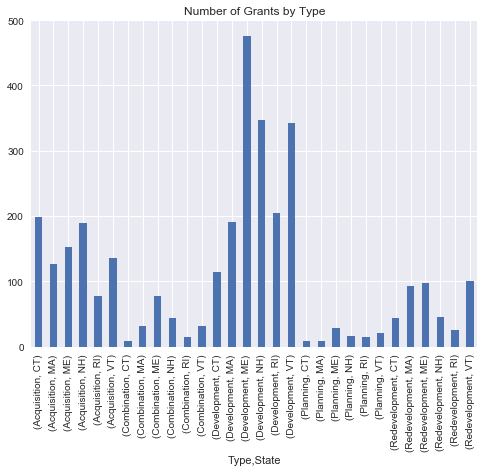

In [24]:
grant_type_counts.plot(kind='bar', figsize=(8,6), title='Number of Grants by Type', stacked=True)